Functional API Basics

In [ ]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(3,))
x = keras.layers.Dense(4, activation="relu")(inputs)
x = keras.layers.Dense(2, activation="relu")(x)
outputs = keras.layers.Dense(1, name="output")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="simple_model")

model.compile(optimizer="rmsprop", loss="mean_squared_error")
model.summary()

Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

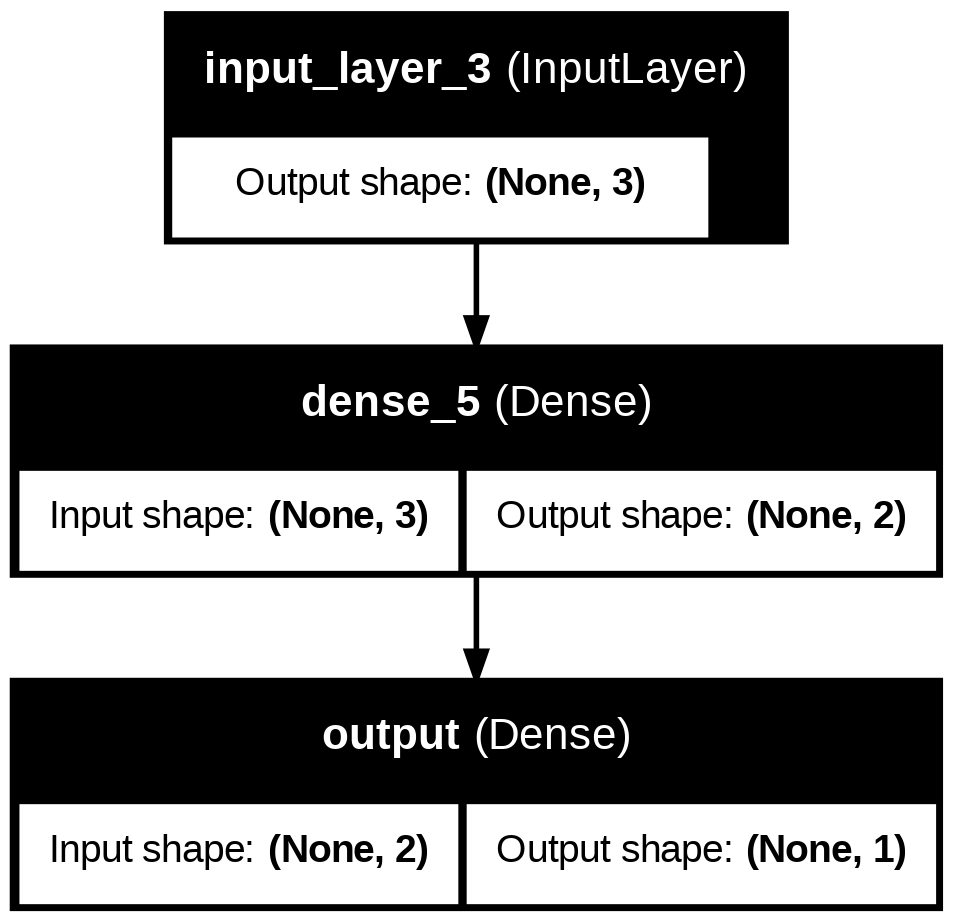

In [ ]:
keras.utils.plot_model(model, "my_first_model.png", show_layer_names=True, show_shapes=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# Normalize the pixel values to a range of [0, 1]
X_train, X_test = X_train / 255, X_test / 255

In [ ]:
import tensorflow as tf
from tensorflow import keras

# model = tf.keras.models.Sequential([
#     tf.keras.Input(shape=(28,28)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu', name="hidden1"),
#     tf.keras.layers.Dense(64, activation='relu', name="hidden2"),
#     tf.keras.layers.Dense(10, activation='softmax', name="output")
# ], name="mnist_classifier")

# Using the Functional API to define our model
inputs = keras.Input(shape=(28,28))
x = keras.layers.Flatten(name="flatten")(inputs)
x = keras.layers.Dense(128, activation="relu", name="hidden1")(x)
x = keras.layers.Dense(64, activation="relu", name="hidden2")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="output")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_classifier")

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "mnist_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# get a specific layer
model.layers[1].weights

[<KerasVariable shape=(784, 128), dtype=float32, path=mnist classifier/hidden1/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=mnist classifier/hidden1/bias>]

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8098 - loss: 0.6734 - val_accuracy: 0.9485 - val_loss: 0.1791
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9516 - loss: 0.1641 - val_accuracy: 0.9625 - val_loss: 0.1260
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9674 - loss: 0.1107 - val_accuracy: 0.9686 - val_loss: 0.1058
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9760 - loss: 0.0782 - val_accuracy: 0.9707 - val_loss: 0.0989
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9728 - val_loss: 0.0910
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9861 - loss: 0.0492 - val_accuracy: 0.9720 - val_loss: 0.0972
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0377 - val_accuracy: 0.9722 - val_loss: 0.0931
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accuracy: 0.

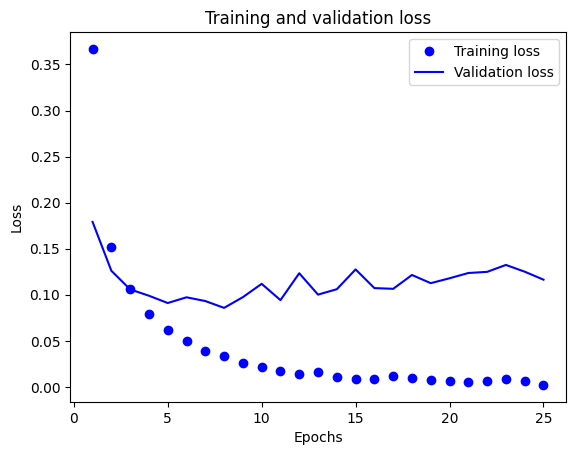

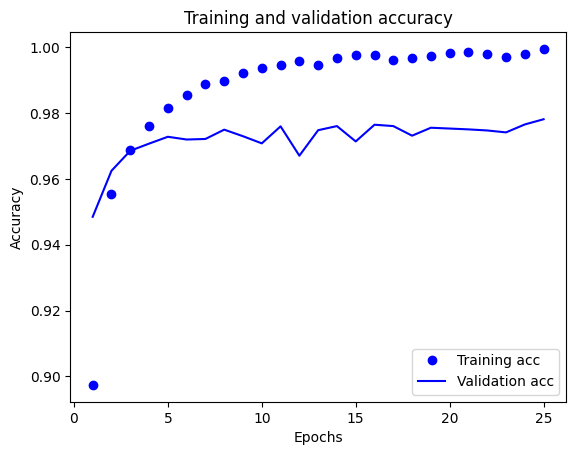

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.1176
Test loss: 0.0997
Test accuracy: 0.9811
